In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/position-salaries/Position_Salaries.csv


In [2]:
df=pd.read_csv("../input/position-salaries/Position_Salaries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [3]:
#LINEAR REGRESSION
x=df.iloc[:,1:2].values
y=df.iloc[:,2:3].values
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
l=LinearRegression()
l.fit(x,y)
Salary_pred=l.predict(x)
df["Salary_pred"]=Salary_pred
df
#we are very off from the salary at first glance itself


,Position,Level,Salary,Salary_pred
0,Business Analyst,1,45000,-114454.545455
1,Junior Consultant,2,50000,-33575.757576
2,Senior Consultant,3,60000,47303.030303
3,Manager,4,80000,128181.818182
4,Country Manager,5,110000,209060.606061
5,Region Manager,6,150000,289939.393939
6,Partner,7,200000,370818.181818
7,Senior Partner,8,300000,451696.969697
8,C-level,9,500000,532575.757576
9,CEO,10,1000000,613454.545455


In [4]:
#EVALUATING WITH METRICS
rmse=np.sqrt(mean_squared_error(y,Salary_pred))
R2=r2_score(y,Salary_pred)
arr={'linear_rmse':rmse,'linear_R2':R2}
arr

{'linear_rmse': 163388.73519272613, 'linear_R2': 0.6690412331929895}

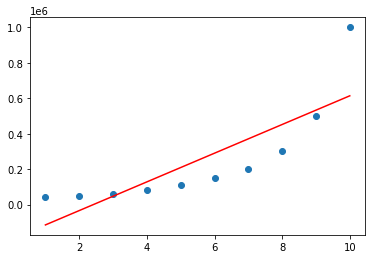

In [5]:
#Linear Regression fails severely in these cases and Polynomial Regression comes to the rescue.
plt.scatter(x,y)
plt.plot(x,Salary_pred,color='Red')

Applying Polynomial Regression


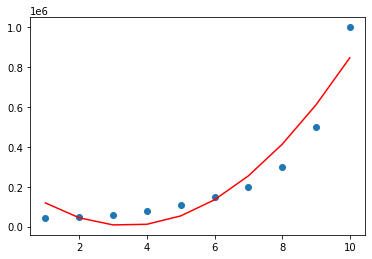

In [6]:
#POLYNOMIAL REGRESSION 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
poly_feat=PolynomialFeatures(degree=2)
x_poly=poly_feat.fit_transform(x)
l=LinearRegression()
l.fit(x_poly,y)
y_polypred=l.predict(x_poly)
plt.scatter(x,y)
plt.plot(x,y_polypred,color='r')

In [7]:
#CALCULATING ERROR TO COMPARE LINEAR AND POLYNOMIAL
polyrmse=np.sqrt(mean_squared_error(y,y_polypred))
polyR2=r2_score(y,y_polypred)
arr1={'Poly_rmse':polyrmse,'polyR2':polyR2}
arr.update(arr1)
arr

{'linear_rmse': 163388.73519272613,
 'linear_R2': 0.6690412331929895,
 'Poly_rmse': 82212.12400451249,
 'polyR2': 0.9162082221443942}

**WE ALWAYS WANT A HIGH R2 SCORE AND A LOW RMSE SCORE. WE OBSERVE THAT THE POLYNOMIAL REGRESSION HAS A MUCH BETTER METRIC AND THE LINE FITS FAR BETTER THAN LINEAR IN CASE OF NON LINEAR DATA.
CHOICE OF MODEL LIES ON THE ONE WHO IS IMPLEMENTING AFTER ALL.**

*The degree of the POLYNOMIAL PREPROCESSING MUST NOT BE TOO HIGH ( OVERFITTING) or TOO LOW (UNDERFITTING).*